<a href="https://colab.research.google.com/github/KhusheyT/LATEXCS2002/blob/main/nasagp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# import libraries
import requests # https
import pandas as pd #dataframe
import numpy as np
import math

#geopandas
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt # matplotlib

In [46]:
# Globals:
MAP_KEY = "c4f9c87a128b458b6a69d96cfc2e3e60"
countries = []

In [47]:
# get fire data from NASA
def fetch_fire_data():
    url="https://firms.modaps.eosdis.nasa.gov/api/area/csv/c4f9c87a128b458b6a69d96cfc2e3e60/VIIRS_SNPP_NRT/world/1/2023-10-08"
    response = requests.get(url)

    if response.status_code == 200:
        data = pd.read_csv(url)
        print(data.head())
        return data
    else:
        print("Failed to fetch data.")
        return None

In [48]:
def calculate_damaged_area_coordinates(latitude, longitude):
    # Create a Polygon object from latitudes and longitudes
    damaged_area_polygon = Polygon(zip(longitude, latitude))

    # Create a GeoDataFrame
    gdf = gpd.GeoDataFrame(geometry=[damaged_area_polygon])
    # Set the Coordinate Reference System (CRS) to WGS 84
    gdf.crs = "EPSG:4326"

    # Calculate the damaged area in square degrees
    damaged_area_square_degrees = gdf.geometry.area.values[0]

    return damaged_area_square_degrees



In [49]:
# visulaize fire data on map
def visualize_fire_data_on_map(data):
    gdf = gpd.GeoDataFrame(data,
                           geometry=gpd.points_from_xy(data.longitude, data.latitude))

    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    fig, ax = plt.subplots(figsize=(10, 6))
    world.boundary.plot(ax=ax, linewidth=1, color='gray')
    gdf.plot(ax=ax, markersize=5, color='red', label='Fire Incidents')

    plt.title('Fire Incidents on Map')
    plt.legend()
    plt.show()


In [50]:
def graph_datas(name, key=MAP_KEY):
    try:
        dates = ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05']
        dfc = []
        for date in dates:
            url = f"https://firms.modaps.eosdis.nasa.gov/api/country/csv/{key}/VIIRS_SNPP_NRT/{name}/1/{date}"
            dfc.append(pd.read_csv(url))

        damage_areas = []

        for df in dfc:
            area = calculate_damaged_area_coordinates(df['latitude'], df['longitude'])
            damage_areas.append(area)

        fig,ax1 = plt.subplots()

        fire_incidents = [5,7,6,8,5]

        ax1.set_xlabel('Date')
        ax1.set_ylabel('Damage Area (sq km)', color='tab:blue')
        ax1.plot(dates, damage_areas, color='tab:blue', marker='o', label='Damage Area')
        ax1.tick_params(axis='y', labelcolor='tab:blue')
        ax1.set_xticklabels(dates, rotation=45)  # Rotate x-axis labels for readability

        # Create a second y-axis for fire incidents

        # Add legends for both datasets
        lines, labels = ax1.get_legend_handles_labels()
        ax1.legend(lines, labels , loc='upper right')

        # Set a title and display the plot
        plt.title('Damage Area over Time')
        plt.tight_layout()
        plt.show()
    except:
        pass

In [51]:
# Function to preprocess data
def preprocess_data(data):
    # relevant_columns = ['latitude', 'longitude', 'confidence', 'bright_ti4', 'acq_date']
    relevant_columns = ['latitude', 'longitude', 'bright_ti4','frp', 'acq_date']
    data = data[relevant_columns]
    data['acq_date'] = pd.to_datetime(data['acq_date'])
    data['is_fire'] = 1  # Simulated: All data points are treated as fire incidents
    return data

0      BOX(-70.0624080069999 12.417669989,-69.8768204...
1      BOX(60.4867777910001 29.3866053260001,74.89230...
2      BOX(11.6693941430001 -18.0314047239998,24.0617...
3      BOX(-63.4288223949999 18.1690941430001,-62.972...
4      BOX(19.5131942070001 59.9044863950001,21.09669...
                             ...                        
239    BOX(-172.782582161 -14.052829685,-171.43769283...
240    BOX(42.5457462900001 12.1114436720001,54.54029...
241    BOX(16.4699813160001 -46.965752863,37.97779381...
242    BOX(21.9798775630001 -18.0692318719999,33.6742...
243    BOX(25.219369751 -22.3973397829999,33.04276818...
Name: geom, Length: 244, dtype: object


<ipython-input-48-1fb29bcb59b4>:11: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  damaged_area_square_degrees = gdf.geometry.area.values[0]
<ipython-input-48-1fb29bcb59b4>:11: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  damaged_area_square_degrees = gdf.geometry.area.values[0]
<ipython-input-48-1fb29bcb59b4>:11: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  damaged_area_square_degrees = gdf.geometry.area.values[0]
<ipython-input-48-1fb29bcb59b4>:11: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geomet

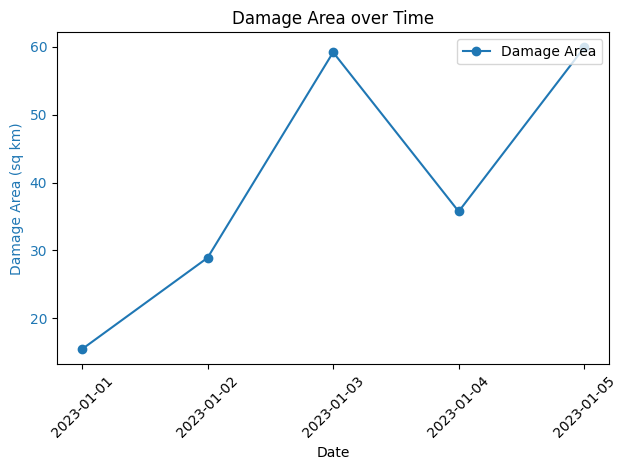

<ipython-input-48-1fb29bcb59b4>:11: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  damaged_area_square_degrees = gdf.geometry.area.values[0]
<ipython-input-48-1fb29bcb59b4>:11: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  damaged_area_square_degrees = gdf.geometry.area.values[0]
<ipython-input-48-1fb29bcb59b4>:11: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  damaged_area_square_degrees = gdf.geometry.area.values[0]


Empty DataFrame
Columns: [Exceeding allowed transaction limit.]
Index: []


KeyError: ignored

In [53]:
# Main function
if __name__ == '__main__':
    # Simulate fetching NASA's fire data
    # fire_data = fetch_fire_data()
    # reads countries
    cname = "IND"
    countries = pd.read_json('https://firms.modaps.eosdis.nasa.gov/api/countries/?format=json')
    print(countries['geom'])

    countries = ['IND', 'ARG', 'USA']
    for c in countries:
        graph_datas(c)

    fire_data = fetch_fire_data()

    if fire_data is not None:
        processed_data = preprocess_data(fire_data)

    #     # if processed_data['frp'][0] > 0.8:
    #     #     sender_email = "adi004gupta@gmail.com"
    #     #     sender_password = "helloadi77"
    #     #     receiver_email = "khushey7thakur@gmail.com

    #         # send_email_alert(sender_email, sender_password, receiver_email)

        # Visualize fire data on a map
        visualize_fire_data_on_map(processed_data)